In [ ]:
student = 'Nikolai Melnikov'
student_id = 100807278
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [ ]:
def t(x=200,y=200):
  if(x<y):
    say='less'
  else:
    say='more'
  print(say)

t()

more


In [ ]:
while(len(d)>3):
  print(d.popitem())
print('Done.')

Done.


In [ ]:
Z.sum()

0.0

Task #1:

In [ ]:
#Load Data
df = pd.read_csv('./flights.csv')
df.head()

year  month  day  dep_time  ...  distance  hour  minute             time_hour
0  2013      1    1     517.0  ...      1400     5      15  2013-01-01T05:00:00Z
1  2013      1    1     533.0  ...      1416     5      29  2013-01-01T05:00:00Z
2  2013      1    1     542.0  ...      1089     5      40  2013-01-01T05:00:00Z
3  2013      1    1     544.0  ...      1576     5      45  2013-01-01T05:00:00Z
4  2013      1    1     554.0  ...       762     6       0  2013-01-01T06:00:00Z

[5 rows x 19 columns]

Task #2:

In [ ]:
#Key Statistics of our dataset
df.describe()

year          month  ...           hour         minute
count  336776.0  336776.000000  ...  336776.000000  336776.000000
mean     2013.0       6.548510  ...      13.180247      26.230100
std         0.0       3.414457  ...       4.661316      19.300846
min      2013.0       1.000000  ...       1.000000       0.000000
25%      2013.0       4.000000  ...       9.000000       8.000000
50%      2013.0       7.000000  ...      13.000000      29.000000
75%      2013.0      10.000000  ...      17.000000      44.000000
max      2013.0      12.000000  ...      23.000000      59.000000

[8 rows x 14 columns]

In [ ]:
#Columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

Text(0, 0.5, 'Count')

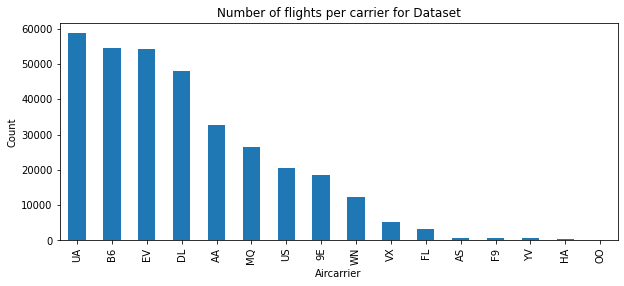

In [ ]:
#Balance
df['carrier'].value_counts().plot.bar(figsize=(10,4),title='Number of flights per carrier for Dataset')
plt.xlabel('Aircarrier')
plt.ylabel('Count')

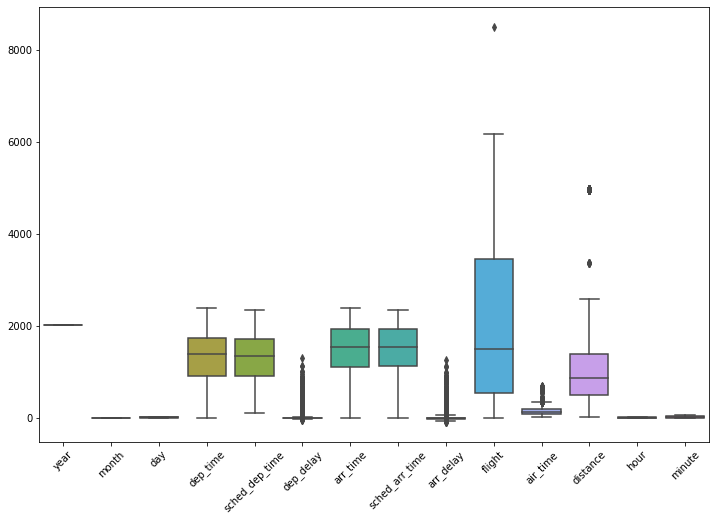

In [ ]:
#Visualization of key statistics of the dataframe
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
sns.boxplot(data=df)

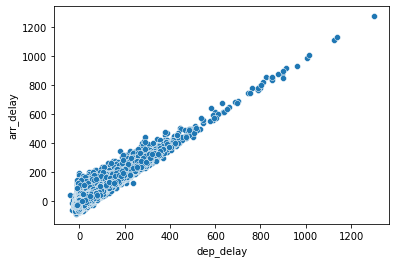

In [ ]:
#Scatter plot to identify correlation between departure delay and arrival delay
sns.scatterplot(x="dep_delay", y="arr_delay", data=df);

Task #3:

In [ ]:
pop_data = df.loc[(df['carrier']=='UA') | (df['carrier']=='DL')]
pop_data = pop_data[['carrier','arr_delay']]

In [ ]:
pop_data.head()

carrier  arr_delay
0       UA       11.0
1       UA       20.0
4       DL      -25.0
5       UA       12.0
12      UA        7.0

Task #4:

In [ ]:
dl = pop_data.loc[pop_data['carrier']=='DL'].head(1000)
dl['sample_id'] = 1
ua = pop_data.loc[pop_data['carrier']=='UA'].head(1000)
ua['sample_id'] = 2

Task #5:

In [ ]:
samples = pd.concat([dl, ua])

In [ ]:
samples

carrier  arr_delay  sample_id
4         DL      -25.0          1
20        DL       -8.0          1
23        DL       -8.0          1
29        DL       -9.0          1
53        DL      -33.0          1
...      ...        ...        ...
5641      UA      -21.0          2
5654      UA       -4.0          2
5655      UA       -7.0          2
5662      UA        6.0          2
5679      UA       -6.0          2

[2000 rows x 3 columns]

Task #6:

In [ ]:
dl_se=round(samples.loc[samples['sample_id'] == 1].sem()['arr_delay'], 3)
dl_mean=round(samples.loc[samples['sample_id'] == 1].mean()['arr_delay'],3)
ua_se=round(samples.loc[samples['sample_id'] == 2].sem()['arr_delay'],3)
ua_mean=round(samples.loc[samples['sample_id'] == 2].mean()['arr_delay'],3)
print(('Standard error for DL: {0}; Standard error for UA: {1}. \nMean for DL: {2}; Mean for UA: {3}').format(dl_se, ua_se, dl_mean, ua_mean))

Standard error for DL: 0.818; Standard error for UA: 0.996. 
Mean for DL: -7.543; Mean for UA: 0.076


Task #7:

In [ ]:
import scipy.stats as st

dl_interval=st.t.interval(0.95, len(dl)-1, loc=dl_mean, scale=dl_se)
ua_interval=st.t.interval(0.95, len(ua)-1, loc=ua_mean, scale=ua_se)
print(('{}(lower) + {}(mean) + {}(upper)').format(dl_interval[0], dl_mean, dl_interval[1]))
print(('{}(lower) + {}(mean) + {}(upper)').format(ua_interval[0], ua_mean, ua_interval[1]))

-9.148195315207161(lower) + -7.543(mean) + -5.937804684792839(upper)
-1.8784920952889148(lower) + 0.076(mean) + 2.0304920952889147(upper)


Task #8:

In [ ]:
from scipy.stats import ttest_ind

ttest_ind(dl_interval, ua_interval)

Ttest_indResult(statistic=-3.0124529709399774, pvalue=0.09478675435425785)

Delta Flights are deayed more